In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('C:/Users/Bagnath/Downloads/Stock Analysis/stocks.csv')


In [45]:
df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


In [46]:
print("Data loaded successfully!")
print("\n--- Shape of dataset ---")
print(df.shape)

Data loaded successfully!

--- Shape of dataset ---
(248, 8)


In [47]:
print("\n--- Columns ---")
print(df.columns.tolist())

print("\n--- First 5 rows ---")
print(df.head())

print("\n--- Data Info ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isna().sum())


--- Columns ---
['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

--- First 5 rows ---
  Ticker        Date        Open        High         Low       Close  \
0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000  

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open      

In [48]:
# DATE CONVERSION & SORTING
# Ensure Date is in datetime format

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.sort_values('Date').reset_index(drop=True)

In [49]:
# Check date range
print("\n--- Date Range ---")
print(f"From {df['Date'].min().date()} to {df['Date'].max().date()}")


--- Date Range ---
From 2023-02-07 to 2023-05-05


In [50]:
# If multiple tickers exist
if 'Ticker' in df.columns:
    print("\n--- Unique Tickers ---")
    print(df['Ticker'].unique())


--- Unique Tickers ---
['AAPL' 'MSFT' 'GOOG' 'NFLX']


In [51]:
# DESCRIPTIVE STATISTICS
print("\n--- Descriptive Statistics ---")
print(df.describe())


--- Descriptive Statistics ---
                                Date        Open        High         Low  \
count                            248  248.000000  248.000000  248.000000   
mean   2023-03-22 22:27:05.806451712  215.252093  217.919662  212.697452   
min              2023-02-07 00:00:00   89.540001   90.129997   88.860001   
25%              2023-03-01 00:00:00  135.235004  137.440004  134.822495   
50%              2023-03-22 12:00:00  208.764999  212.614998  208.184998   
75%              2023-04-14 00:00:00  304.177505  307.565002  295.437500   
max              2023-05-05 00:00:00  372.410004  373.829987  361.739990   
std                              NaN   91.691315   92.863023   90.147881   

            Close   Adj Close        Volume  
count  248.000000  248.000000  2.480000e+02  
mean   215.381674  215.362697  3.208210e+07  
min     89.349998   89.349998  2.657900e+06  
25%    136.347498  136.347498  1.714180e+07  
50%    209.920006  209.920006  2.734000e+07  
75%    

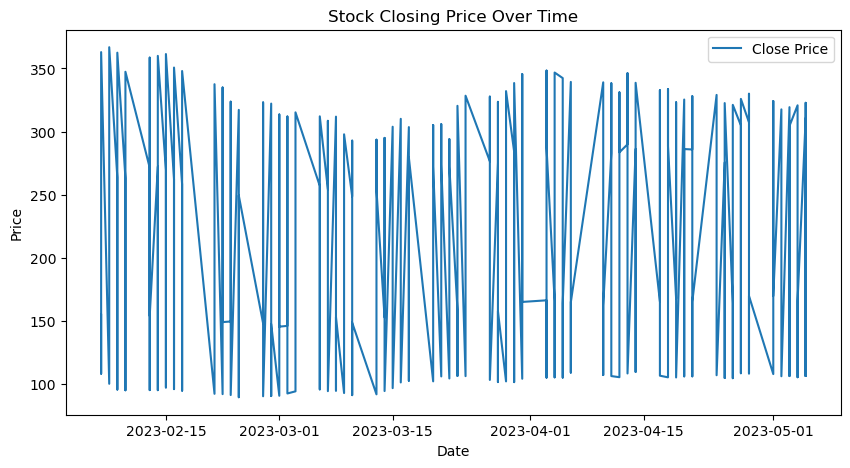

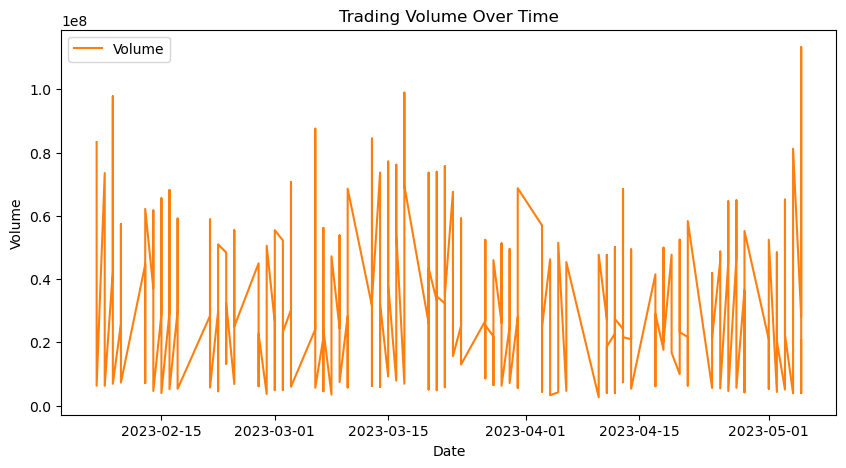

In [52]:
# VISUALIZE PRICE AND VOLUME
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Close'], color='tab:blue', label='Close Price')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Volume'], color='tab:orange', label='Volume')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [53]:
# STEP 2: FEATURE ENGINEERING & ADVANCED METRICS

# --- DAILY RETURN (%)
df['Daily Return (%)'] = df['Close'].pct_change() * 100

# --- CUMULATIVE RETURN (%)
df['Cumulative Return (%)'] = (1 + df['Close'].pct_change()).cumprod() - 1

# --- MOVING AVERAGES ---
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_200'] = df['Close'].rolling(window=200).mean()

# --- ROLLING VOLATILITY (30-day) ---
df['Volatility_30d'] = df['Daily Return (%)'].rolling(window=30).std()

In [54]:
print("\n New columns added:")
print(df.columns.tolist())


 New columns added:
['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily Return (%)', 'Cumulative Return (%)', 'MA_20', 'MA_50', 'MA_200', 'Volatility_30d']


In [55]:
df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return (%),Cumulative Return (%),MA_20,MA_50,MA_200,Volatility_30d
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600,NaN,NaN,NaN,NaN,NaN,NaN
1,MSFT,2023-02-07,260.529999,268.769989,260.079987,267.559998,266.891510,50841400,73.010028,0.730100,NaN,NaN,NaN,NaN
2,GOOG,2023-02-07,103.629997,108.669998,103.547997,108.040001,108.040001,33738800,-59.620271,-0.301390,NaN,NaN,NaN,NaN
3,NFLX,2023-02-07,358.510010,364.179993,354.179993,362.950012,362.950012,6289400,235.940401,1.346913,NaN,NaN,NaN,NaN
4,GOOG,2023-02-08,102.690002,103.580002,98.455002,100.000000,100.000000,73546000,-72.447997,-0.353379,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,AAPL,2023-05-04,164.889999,167.039993,164.309998,165.789993,165.789993,81235400,-45.715598,0.072034,225.700497,226.608399,214.892500,94.942680
244,MSFT,2023-05-05,305.720001,311.970001,304.269989,310.649994,310.649994,28181200,87.375600,1.008729,225.869997,226.147399,215.698750,94.717808
245,AAPL,2023-05-05,170.979996,174.300003,170.759995,173.570007,173.570007,113316400,-44.126827,0.122341,218.051997,223.851399,215.292750,89.654142
246,NFLX,2023-05-05,323.609985,324.149994,319.440002,322.760010,322.760010,3988600,85.953792,1.087035,228.778998,226.953999,215.288300,89.228486


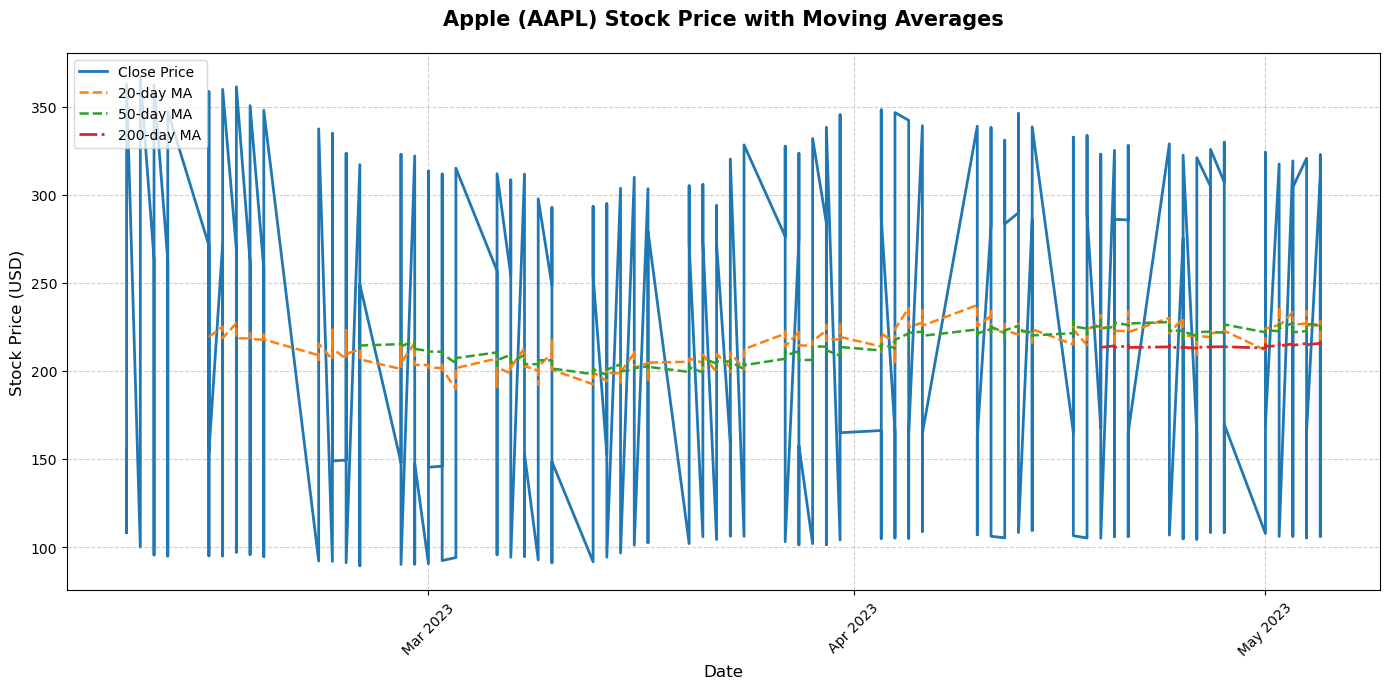

In [56]:
import matplotlib.ticker as mticker
import matplotlib.dates as mdates

# PRICE + MOVING AVERAGES

plt.figure(figsize=(14,7))
plt.plot(df['Date'], df['Close'], label='Close Price', color='#1f77b4', linewidth=2.0)
plt.plot(df['Date'], df['MA_20'], label='20-day MA', color='#ff7f0e', linewidth=1.8, linestyle='--')
plt.plot(df['Date'], df['MA_50'], label='50-day MA', color='#2ca02c', linewidth=1.8, linestyle='--')
plt.plot(df['Date'], df['MA_200'], label='200-day MA', color='#d62728', linewidth=2, linestyle='-.')

plt.title('Apple (AAPL) Stock Price with Moving Averages', fontsize=15, weight='bold', pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price (USD)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

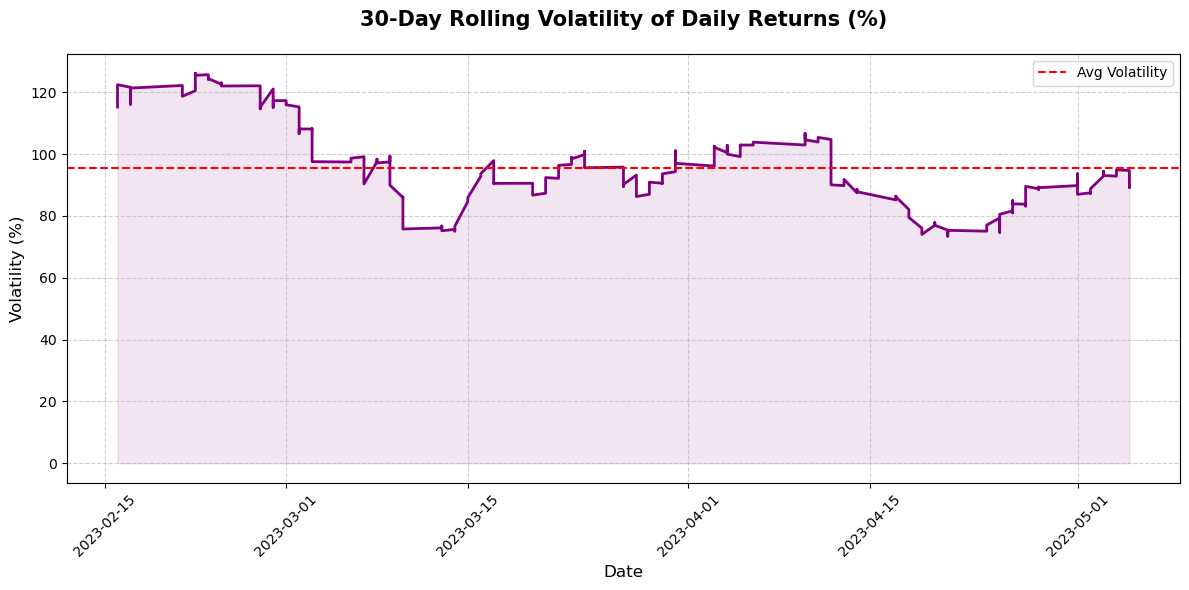

In [57]:
# 30-DAY ROLLING VOLATILITY

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Volatility_30d'], color='purple', linewidth=2.0)
plt.fill_between(df['Date'], df['Volatility_30d'], color='purple', alpha=0.1)
plt.axhline(df['Volatility_30d'].mean(), color='red', linestyle='--', linewidth=1.5, label='Avg Volatility')

plt.title('30-Day Rolling Volatility of Daily Returns (%)', fontsize=15, weight='bold', pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volatility (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

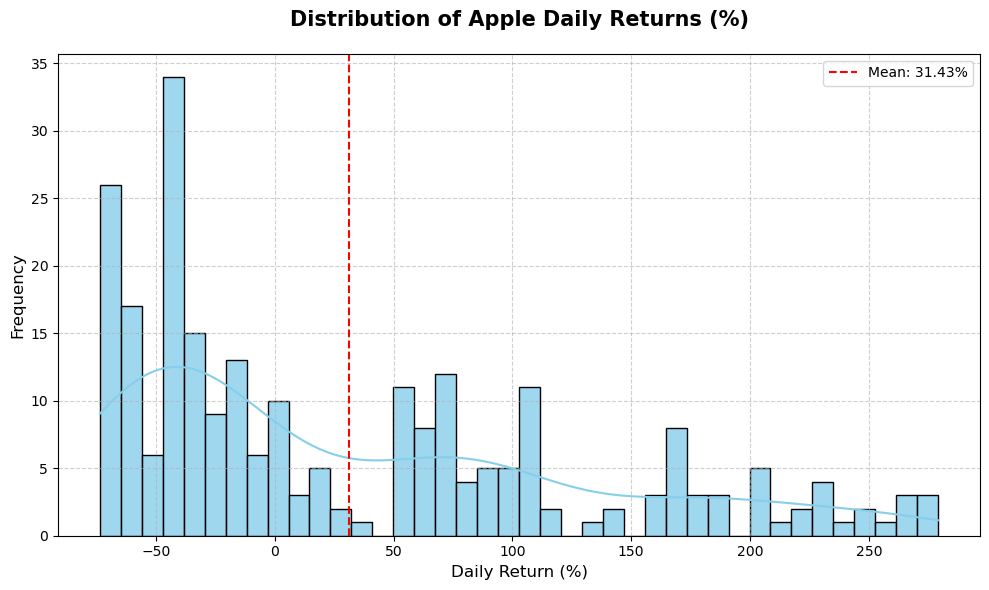

In [58]:
# DISTRIBUTION OF DAILY RETURNS

plt.figure(figsize=(10,6))
sns.histplot(df['Daily Return (%)'].dropna(), bins=40, kde=True, color='skyblue', edgecolor='black', alpha=0.8)

mean_return = df['Daily Return (%)'].mean()
plt.axvline(mean_return, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_return:.2f}%')

plt.title('Distribution of Apple Daily Returns (%)', fontsize=15, weight='bold', pad=20)
plt.xlabel('Daily Return (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [59]:
# SUMMARY STATS OF RETURNS

print("\n--- Daily Returns Summary ---")
print(df['Daily Return (%)'].describe())


--- Daily Returns Summary ---
count    247.000000
mean      31.425086
std       95.841264
min      -73.545808
25%      -42.859938
50%       -5.705078
75%       90.332406
max      279.104795
Name: Daily Return (%), dtype: float64


In [60]:
# STEP 4A: ARIMA FORECASTING

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Focus only on 'Close' column
data = df.set_index('Date')['Close']

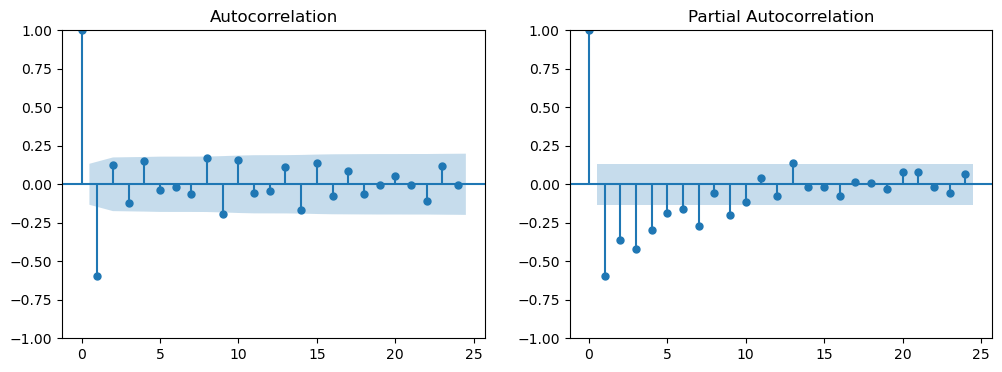

In [61]:
# Split train-test (last 30 days for testing)
train = data[:-30]
test = data[-30:]

# Plot ACF and PACF to check stationarity
fig, ax = plt.subplots(1,2, figsize=(12,4))
plot_acf(train.diff().dropna(), ax=ax[0])
plot_pacf(train.diff().dropna(), ax=ax[1])
plt.show()

In [62]:
# Build ARIMA model (p,d,q = 5,1,0 works well for stock-like data)
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

print(model_fit.summary())

# Forecast next 30 days
forecast = model_fit.forecast(steps=30)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  218
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1292.693
Date:                Tue, 11 Nov 2025   AIC                           2597.385
Time:                        12:02:29   BIC                           2617.665
Sample:                             0   HQIC                          2605.577
                                - 218                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1658      0.072    -16.270      0.000      -1.306      -1.025
ar.L2         -1.0792      0.107    -10.110      0.000      -1.288      -0.870
ar.L3         -0.9123      0.119     -7.639      0.0

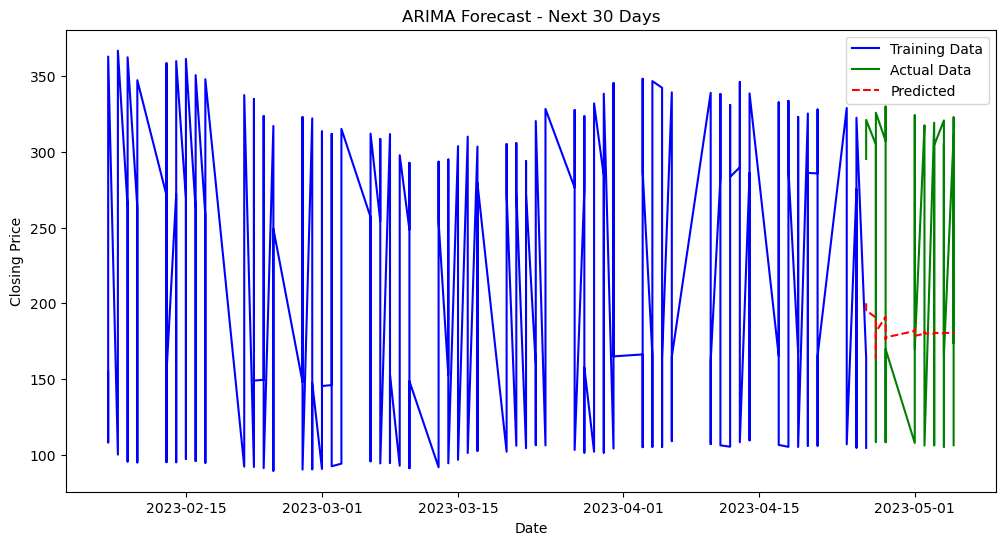

In [63]:
# Combine and visualize
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Actual Data', color='green')
plt.plot(test.index, forecast, label='Predicted', color='red', linestyle='--')
plt.title('ARIMA Forecast - Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()